# Lab 4: Modelling a two-layer greenhouse atmosphere
We will continue refining some of the skills we have already developed to explore the greenhouse effect in more detail.  We will introduce the concept of ***radiative forcing***. Our science questions are:
- What is the radiative forcing on the Earth system from a small increase in greenhouse gases ("absorbers")?
- Why is the vertical structure of the atmosphere important for the atmospheric greenhouse effect?

### Science background
To study radiation imbalance last week, we used a *transmissivity*, $\tau$, which permitted only some radiation through the atmosphere...but we didn't deal with radiation in the atmosphere itself! Here we are going to allow some radiation to be absorbed and re-emitted by each atmospheric layer, by introducing a parameter called ***absorptivity***.  The absorptivity must be equal to the *emissivity*, the fraction of blackbody radiation that is effectively radiated, so we use the same symbol for both: $\epsilon$.

Note that absorptivity is the complement of transmissivity: radiation must be either transmitted or absorbed.  Thus, 
$$
\begin{align}
\tau + \epsilon &= 1 \\
\tau &= 1-\epsilon
\end{align}
$$

This gives us the tools to set up a more sophisticated, two-layer atmosphere.  A sketch of the radiative fluxes is below.

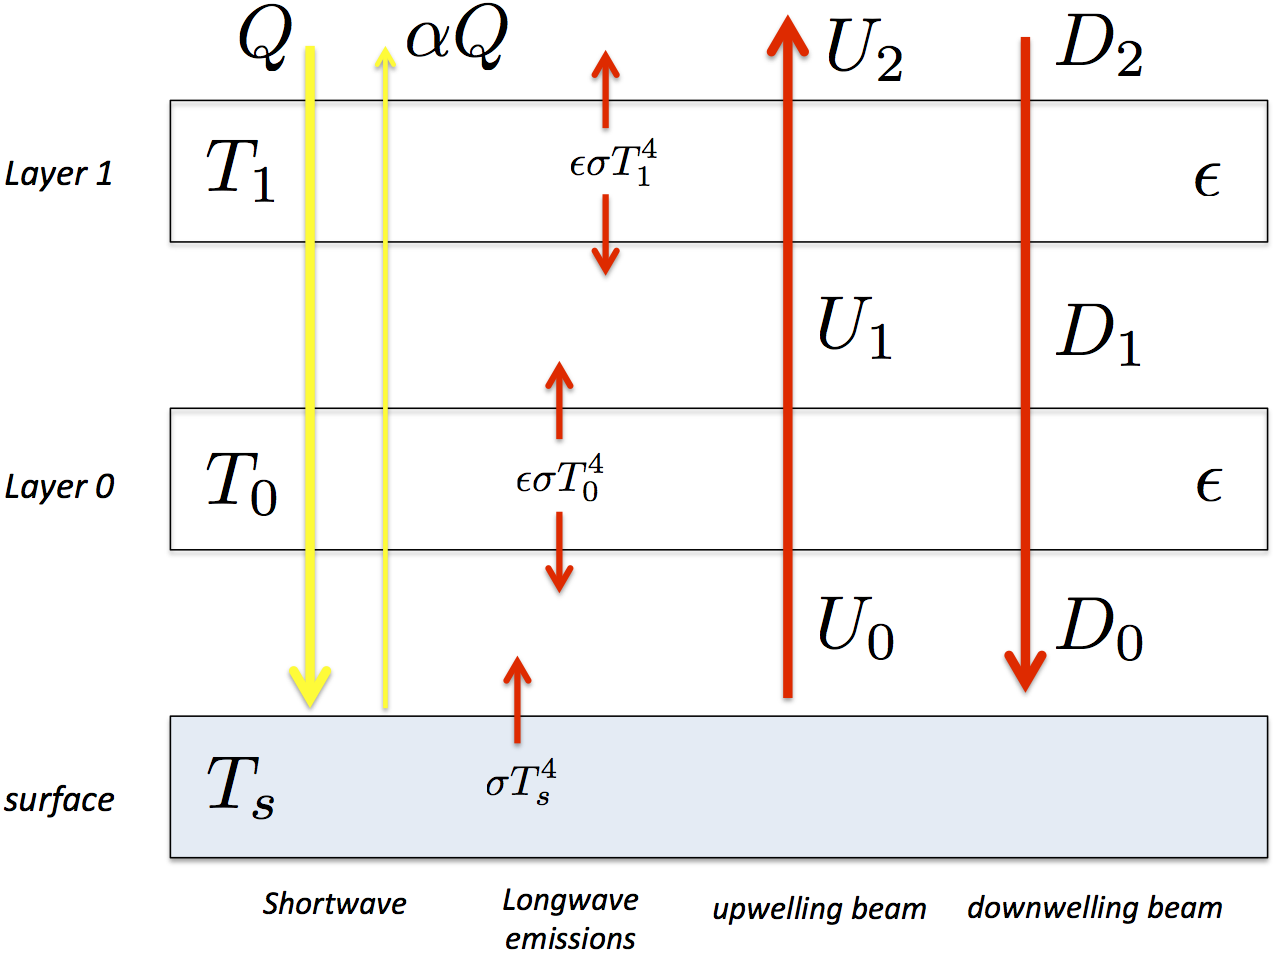

In this model:
- Incoming solar radiation is $Q$, and the absorbed portion is $(1-\alpha)Q$.
- Surface temperature is $T_s$
- We assume two atmospheric layers of equal mass
- Atmospheric temperatures are $T_0, T_1$, where $T_0$ is closest to the surface.
- Absorptivity of atmospheric layers is $\epsilon$ (identical for both)
- Surface emission is $\sigma T_s^4$
- Atmospheric emission is $\epsilon \sigma T_0^4, \epsilon \sigma T_1^4$ (up and down)
- Absorptivity = emissivity for atmospheric layers
- A fraction $(1-\epsilon)$ of the longwave beam is transmitted through each layer

____________
### Tracing the upwelling beam of longwave radiation

Let's think about the upwelling beam of longwave radiation, which we denote $U$.

#### Surface to layer 0

We start at the surface. The upward flux **from the surface to layer 0** is 

$$U_0 = \sigma T_s^4$$

(just the emission from the suface).

#### Layer 0 to layer 1

Now **following this beam upward**, we first recognize that a fraction $\epsilon$ of this beam is **absorbed** in layer 0. 

The upward flux from layer 0 to layer 1 consists of the sum of two parts:

1. The **transmitted part** of whatever is incident from below (i.e. the part that is **not absorbed**)
2. **New upward emissions** from layer 0

We can write this upward flux from layer 0 to layer 1 as:

$$U_1 = (1-\epsilon) \sigma T_s^4 + \epsilon \sigma T_0^4$$

#### Beyond layer 1

Continuing to follow the same beam, we follow the same logic! A fraction $\epsilon$ of $U_1$ is absorbed in layer 1, and therefore the transmitted part is $(1-\epsilon) U_1$.

Including new emissions from layer 1, the upwelling flux above layer 1 is

$$U_2 = (1-\epsilon) U_1 + \epsilon \sigma T_1^4$$

#### Total Outgoing Longwave Radiation

Since there is **no more atmosphere above layer 1**, this upwelling beam from the upper layer is our OLR for this model:

$$\text{OLR} = U_2 = (1-\epsilon) U_1 + \epsilon \sigma T_1^4$$

which, substituting the above expression for $U_1$, works out to

$$\text{OLR} = (1-\epsilon)^2 \sigma T_s^4 + \epsilon(1-\epsilon)\sigma T_0^4 + \epsilon \sigma T_1^4$$

Here the three terms represent **contributions to the total OLR** that **originate from each of the three levels**

### Definition of Radiative Forcing

We now define a very important quantity:

***"Radiative forcing"*** is the **change in total radiative flux at the top of the atmosphere after making some change** (usually adding absorbers to the atmosphere).

In our model, **only the longwave flux can change**, so we calculate the radiative forcing as

$$ R = - \Delta \text{OLR} $$

(with the minus sign so that $R$ is **positive when the climate system is gaining extra energy**).

***
## Part 1: Demonstration and skills practice

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from metpy.plots import SkewT

---
### 1. Graphical solution of equations

We want to build some Python tools to explore radiation components in this model.  From the above equation for OLR, you can see we will need to estimate the temperatures at the surface and in each atmospheric layer.

To get appropriate temperatures for $T_s, T_0, T_1$, we would like to know average temperatures at each level.  We can use the observed global mean surface temperature $T_s=288$ K at the surface, but what about in the atmosphere?

In atmospheric science, we use **Skew-T** diagrams to analyse the thermal profile of the atmosphere. These diagrams show pressure (a proxy for elevation) on the vertical axis and temperature slanting upward ("skewed") from the horizontal axis.  Pressure decreases as elevation increases, so you can imagine this as a profile through the atmosphere, with the surface at the bottom and the upper atmosphere on top.

Below is a skew-T diagram of the observed, annual global mean temperature profile. We assumed two atmospheric layers of equal mass, which puts the dividing line between lower and upper around the 500 hPa pressure level on this plot. 

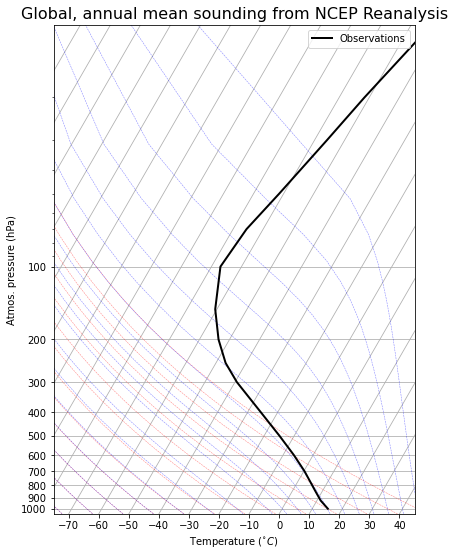

In [2]:
#  This code is used just to create the skew-T plot of global, annual mean air temperature

ncep_url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/"
ncep_air = xr.open_dataset( ncep_url + "pressure/air.mon.1981-2010.ltm.nc", use_cftime=True)
#  Take global, annual average and convert to Kelvin
coslat = np.cos(np.deg2rad(ncep_air.lat))
weight = coslat / coslat.mean(dim='lat')
Tglobal = (ncep_air.air * weight).mean(dim=('lat','lon','time'))
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=30)
skew.plot(Tglobal.level, Tglobal, color='black', linestyle='-', linewidth=2, label='Observations')
skew.ax.set_ylim(1050, 10)
skew.ax.set_xlim(-75, 45)
# Add the relevant special lines
skew.plot_dry_adiabats(linewidth=0.5)
skew.plot_moist_adiabats(linewidth=0.5)
#skew.plot_mixing_lines()
skew.ax.legend()
skew.ax.set_xlabel(r'Temperature ($^{\circ} C$)')
skew.ax.set_ylabel('Atmos. pressure (hPa)')
skew.ax.set_title('Global, annual mean sounding from NCEP Reanalysis', fontsize = 16);

In [3]:
## fill this in from the plot
T_s_obs_C = ?? ## C, the observed surface temperature
T0_obs_C = ?? ## C, approximate "lower atmosphere" temperature from the observations
T1_obs_C = ?? ## C, approximate "upper atmosphere" temperature from the observations

In [3]:
## convert the tempertatures from C to K

def C_to_K_func(C = ):
    ...

T_s_obs = ?? ## K, the observed surface temperature
T0_obs = ?? ## K, approximate "lower atmosphere" temperature from the observations
T1_obs = ?? ## K, approximate "upper atmosphere" temperature from the observations

We have just read off approximate values that correspond to what we are looking for.  Similarly, when we have a system of equations, we can set them up to test a range of possible solution values and then use graphical tactics to find an approximate solution.

**Demonstration: graphical solution of equations**

Last week we solved analytically for the equilibrium temperature.  We could also do that graphically, by finding the intersection of ASR and OLR.  We will apply our knowledge of functions and for-loops to set that up.


In [ ]:
## Cam to demonstrate here

In [5]:
## define our equations for ASR and OLR

In [6]:
## solve ASR and OLR for a a series of temperatures

T_tests = np.linspace(273, 323, 50) ## our array of temperatures to test, in K
OLR_tests = [] ## list to store the output of our OLR test
ASR_tests = [] ## list to store the output of ASR for each temperature
...

What do you think the equilibrium value should be?  How will we identify it on the plot?

In [ ]:
## plotting code

This shows that the two lines cross around 289 K, which implies an equilibrium temperature close to what we computed in lab last week (roughly 288 K).

---
### 2. Finding values in an array that meet a condition

We can read an approximate value of $T_s$ from the plot above, but what if we want to use the numeric value later on?

Finding the intersection of two curves can be done many ways in Python.  Here, because both curves come from arrays with the same "x-axis" (`T_steps`), we can search the array for where their difference is minimum.  Remember, the computer does not do "continuous" -- we are searching a discrete list of values, however many we tested above.

In [ ]:
min(np.asarray(OLR_tests)-np.asarray(ASR_tests))

Ah, that's a big difference.  What happened?  We have to remember to minimize the *absolute value* of the difference!

In [ ]:
min(abs(np.asarray(OLR_tests)-np.asarray(ASR_tests)))

Okay, but what we want isn't really the absolute difference, it's the *value of the temperature for which the difference is minimized*.  So we need to find where in that array the minimum difference occurs, and then we need to find the value from `T_tests` at that position.

In [ ]:
print((np.abs(np.asarray(OLR_tests) - np.asarray(ASR_tests))).argmin())

We can use this right away to annotate our plot more precisely.

In [ ]:
## code to update plot
## try adding this lin to your plot from above: ax.text(T_tests[16], OLR_tests[16], 'right here!')

---
### 3. Functions that output multiple values

Functions are very flexible!  For example, we can define a function that outputs multiple values or a list or array of values.  Here is how we would do that:

In [14]:
## Defining a function that outputs two values
def test_func():
    return 10, 20 ## no matter what, just return the values 10 and 20

In [ ]:
test_func()

In [ ]:
output_vals = test_func()
output_vals[0]

In [ ]:
output_1, output_2 = test_func()
output_2

We can also create and output a list of values.  Let's use an example from Dessler:  We want to compute the radiative contribution from each of n layers of an atmosphere.

In [21]:
def radiative_contribution(nlayers, S=1360, albedo=0.3):
    output_rads = np.zeros(nlayers+1) ## set up list of length n+1, for each layer plus the surface
    for i in range(nlayers+1):
        output_rads[i] = S*(1-albedo)*(i+1) / 4
    
    return output_rads ## top of atmosphere first, surface last

In [ ]:
radiative_contribution(1)

#### *Exercise*:
Define a function called `OLR_components` that returns multiple values: the part of OLR from the surface, lower atmosphere, and upper atmosphere.  Assign the values to different named variables and examine them, assuming reasonable values of absorptivity (between 0 and 1).

In [25]:
## Your code here
def OLR_components(...):
    '''You define'''
    return ...

In [ ]:
surf_OLR, a0_OLR, a1_OLR = OLR_components(...) ## call the function and assign it to variables like this
components = OLR_components(...) ## or assign to a list like this and call from the list

In [ ]:
sum(components)

---
## Part 2: Lab procedure

Assume a two-layer atmosphere with layers Surface, Layer 0, and Layer 1.

1. Find a best-fit value of absorptivity $\epsilon$ by graphical solution.  To do this, you will need to:
    - Write a Python function that computes OLR, given the temperatures `Ts`, `T0`, `T1` and the absorptivity `epsilon` as inputs.
    - Make a graph of OLR versus $\epsilon$, for an appropriate range of $\epsilon$.  Use temperatures as read from the skew-T diagram (`Ts=288`, `T0=275`, `T1=230` K.)
    - Highlight the value that matches observed OLR.
2. Confirm your finding from (1) using array search.
3. Define named variables `OLR_s`, `OLR_0`, and `OLR_1` corresponding to the *terms* in the total OLR coming from the surface, the lower atmosphere, and the upper atmosphere in this model.  Calculate them according to the formula for total OLR for our two-layer atmosphere, with your tuned value of absorptivity $\epsilon$.  You can do this with your reusable function, or in "hand calculator" style.
    - Verify that the total OLR is close to the observed average OLR (from Trenberth & Fasullo or Dessler).
4. Define a reusable function `RF_components` to compute the **radiative forcing** of a given change in absorptivity $\epsilon$.  Your function should take the temperatures `Ts`, `T0`, `T1`, the absorptivity `epsilon`, and the change in absorptivity `delta_epsilon` as inputs.
5. Compute the radiative forcing of a 2% increase in absorbers for current Earth conditions, with temperatures as above (`Ts=288`, `T0=275`, `T1=230` K.)
    - Interpret: based on this radiative forcing, would OLR go up or down?
    - What does this suggest will happen to global mean surface temperature?  
    - What does this suggest will happen to temperature in the upper atmosphere?
6. Repeat this experiment for an *isothermal* surface and atmosphere, where `Ts=T0=T1`.
    - Interpret: How does the vertical temperature structure of Earth's atmosphere shape the greenhouse effect we experience?

In [ ]:
## add cells of code and markdown here to complete the lab

---
### Endnotes

- This notebook is based on a chapter of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook), an open-source textbook developed and maintained by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

- This [National Weather Service interactive](https://www.noaa.gov/jetstream/upperair/skewt_samples) will help orient you to the lines included on a skew-T diagram.  Focus on the temperature and pressure lines for our purposes. 

- See [here](https://www.noaa.gov/jetstream/atmosphere/layers-of-atmosphere) for more on the vertical temperature structure of Earth's atmosphere, and [here](https://newsroom.ucla.edu/releases/stratospheric-cooling-vertical-fingerprinting) for recent observations of the upper atmosphere.

- This lab notebook last updated by Cam de Wet, 4 Mar 2025